In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_rectangles(contours):
    rectangles = []
    for contour in contours:
        epsilon = 0.04 * cv2.arcLength(contour, True)
        hull = cv2.convexHull(contour)
        approx = cv2.approxPolyDP(hull, epsilon, True)
        if (len(approx) == 4 and cv2.isContourConvex(approx)):
            rectangles.append(approx)

    return rectangles


# image_1 = cv2.imread("./photos/GloryDays/bib-sample.jpg")
def find_bib(image_1):

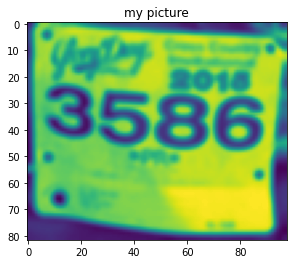

In [3]:
    width, height, depth = image_1.shape

    gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
    #gray = cv2.equalizeHist(gray)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    plt.imshow(blurred)
    # plt.title('my picture')
    # plt.show()

    #binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=25, C=0);
    ret, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #ret,binary = cv2.threshold(blurred, 170, 255, cv2.THRESH_BINARY);
    #plt.imshow(binary)
    #plt.show()

    threshold_contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    edges = cv2.Canny(gray, 175, 200, 3)
    edge_contours, hierarchy = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = threshold_contours + edge_contours

    rectangles = []
    for contour in contours:
        epsilon = 0.04 * cv2.arcLength(contour, True)
        hull = cv2.convexHull(contour)
        approx = cv2.approxPolyDP(hull, epsilon, True)
        if (len(approx) == 4 and cv2.isContourConvex(approx)):
            rectangles.append(approx)

        image_area = width * height
    min_bib_size = image_area / 12
    max_bib_size = image_area / 4
    potential_bibs = []

    for rect in rectangles:
        (x, y), (w, h), theta = cv2.minAreaRect(rect)
        aspect_ratio = float(w) / float(h)
        if (cv2.contourArea(rect) > min_bib_size and cv2.contourArea(rect) < max_bib_size
                and aspect_ratio(rect) > 0.75 and aspect_ratio(rect) < 2.5):
            potential_bibs.append(rect)

        ideal_aspect_ratio = 1.0
    potential_bibs = sorted(potential_bibs, key=lambda bib: abs(aspect_ratio(bib) - ideal_aspect_ratio))

    return potential_bibs[0] if len(potential_bibs) > 0 else np.array([[(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)]])



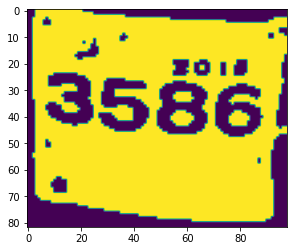

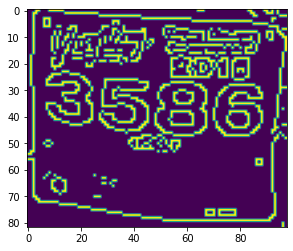

In [6]:


#plt.imshow(edges)
#plt.show()

In [9]:

# print(potential_bibs)

[]


In [ ]:
# cv2.drawContours(image_1,[bib],-1,(0,0,255), 2)

In [13]:
# x,y,w,h = cv2.boundingRect(bib)

In [14]:
# cv2.rectangle(image_1,(x,y),(x+w,y+h),(0,255,0),2)
# cv2.imwrite("out.jpg", image_1)

True